<a href="https://colab.research.google.com/github/HariKiran-19/MobiusStrip/blob/main/MobiusStrip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Approximate Surface Area: 62.93768644373045
Approximate Edge Length: 63.1511893974687


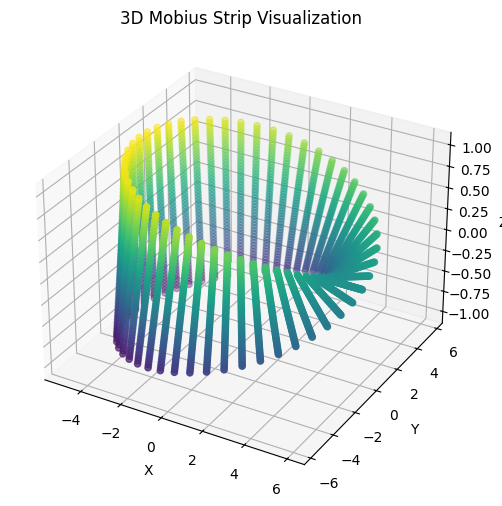

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

class MobiusStrip:
    def __init__(self, R, w, n):
        self.R = R
        self.w = w
        self.n = n
        self.u_values = np.linspace(0, 2*np.pi, n)
        self.v_values = np.linspace(-w/2, w/2, n)
        self.x, self.y, self.z = self.compute_mesh()

    def parametric_equations(self, u, v):
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    def compute_mesh(self):
        x_vals, y_vals, z_vals = [], [], []
        for u in self.u_values:
            for v in self.v_values:
                x, y, z = self.parametric_equations(u, v)
                x_vals.append(x)
                y_vals.append(y)
                z_vals.append(z)
        return np.array(x_vals), np.array(y_vals), np.array(z_vals)

    def surface_area_approx(self):
        def integrand(u, v):
            x_u = -np.sin(u) * (self.R + v * np.cos(u / 2)) + (-0.5 * v * np.sin(u / 2)) * np.cos(u)
            y_u = np.cos(u) * (self.R + v * np.cos(u / 2)) + (-0.5 * v * np.sin(u / 2)) * np.sin(u)
            z_u = 0.5 * v * np.cos(u / 2)

            x_v = np.cos(u) * np.cos(u / 2)
            y_v = np.sin(u) * np.cos(u / 2)
            z_v = np.sin(u / 2)

            normal = np.cross([x_u, y_u, z_u], [x_v, y_v, z_v])
            return np.linalg.norm(normal)

        area, _ = quad(lambda u: quad(lambda v: integrand(u, v), -self.w/2, self.w/2)[0], 0, 2*np.pi)
        return area

    def edge_length_approx(self):
        # Compute the boundary curve where v = w/2 (top edge)
        u = np.linspace(0, 2 * np.pi, 1000)  # High resolution for accuracy
        v = self.w / 2
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)

        # Compute derivatives using central differences
        dxdu = np.gradient(x, u)
        dydu = np.gradient(y, u)
        dzdu = np.gradient(z, u)

        # Compute the integrand ||dr/du||
        integrand = np.sqrt(dxdu**2 + dydu**2 + dzdu**2)

        # Use trapezoid rule for integration
        length = np.trapezoid(integrand, u)

        # Multiply by 2 to account for both edges
        return 2 * length

    def plot_3D(self):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.x, self.y, self.z, c=self.z, cmap='viridis')
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.title("3D Mobius Strip Visualization")
        plt.show()

# Example usage
mobius = MobiusStrip(R=5, w=2, n=50)
print("Approximate Surface Area:", mobius.surface_area_approx())
print("Approximate Edge Length:", mobius.edge_length_approx())
mobius.plot_3D()